# Population_Data_Visualisation

In [2]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
import math
import datetime as dt
import os
import sys

## Utility Functions

In [3]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    

## Loading Population_Data Data

In [4]:
Population_Data_Countires_Wise_descreet = pd.read_csv('../../Population_Data/WPP2019_TotalPopulationBySex.csv')
Population_Data_Countires_Wise_descreet

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


In [13]:
## Check the List of Countries avaialable
##
full_pop_data = Population_Data_Countires_Wise_descreet
##

## Columns renaming for Uniformity
Population_Data_Countires_Wise_descreet = Population_Data_Countires_Wise_descreet.rename(columns={'Location': 'Country'})
count_avalaible(Population_Data_Countires_Wise_descreet,'Country')

Fiji | Democratic Republic of the Congo | Guatemala | Central Asia | Burkina Faso | Land-locked Countries | Côte d'Ivoire | 
Least developed countries | Mali | Malaysia | Eritrea | Australia/New Zealand | ESCWA: Arab least developed countries | Belt-Road Initiative: Africa | 
ESCAP: lower middle HDI | UNFPA Regions | Ghana | Panama | Lao People's Democratic Republic | Land-locked Countries (Others) | Kenya | 
British Virgin Islands | Niue | Paraguay | Thailand | UNICEF Programme Regions: Middle East and North Africa (MENARO) | Saint Kitts and Nevis | Equatorial Guinea | 
Palau | North Macedonia | Congo | UNICEF Regions: Middle East and North Africa | LLDC: Asia | UNICEF REGIONS | Eswatini | 
Less developed regions, excluding China | Pakistan | Africa | Countries with Access to the Sea | UNICEF Regions: Western Europe | ESCWA: Mashreq countries | Egypt | 
Least developed: Asia | Kazakhstan | Latin America and the Caribbean | Latin American and Caribbean Group (GRULAC) | Hungary | ESCAP 

In [5]:
Population_Data_Countires_Wise = pd.read_csv('../../Population_Data/WPP2019_PopulationBySingleAgeSex_1950-2019.csv')
Population_Data_Countires_Wise

,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2,Medium,1950,1950.5,0,0,1,139.669,154.913,294.582
1,4,Afghanistan,2,Medium,1950,1950.5,1,1,1,131.916,141.851,273.767
2,4,Afghanistan,2,Medium,1950,1950.5,2,2,1,125.127,130.632,255.759
3,4,Afghanistan,2,Medium,1950,1950.5,3,3,1,119.220,121.097,240.317
4,4,Afghanistan,2,Medium,1950,1950.5,4,4,1,114.112,113.085,227.197
...,...,...,...,...,...,...,...,...,...,...,...,...
3132005,716,Zimbabwe,2,Medium,2019,2019.5,96,96,1,0.019,0.120,0.139
3132006,716,Zimbabwe,2,Medium,2019,2019.5,97,97,1,0.013,0.083,0.096
3132007,716,Zimbabwe,2,Medium,2019,2019.5,98,98,1,0.006,0.043,0.049
3132008,716,Zimbabwe,2,Medium,2019,2019.5,99,99,1,0.002,0.015,0.017


In [6]:
## Check the List of Countries avaialable
##
full_pop_data = Population_Data_Countires_Wise
##

## Columns renaming for Uniformity
Population_Data_Countires_Wise = Population_Data_Countires_Wise.rename(columns={'Location': 'Country'})
count_avalaible(Population_Data_Countires_Wise,'Country')

Fiji | Democratic Republic of the Congo | Guatemala | Central Asia | Burkina Faso | Land-locked Countries | Côte d'Ivoire | 
Least developed countries | Mali | Malaysia | Eritrea | Australia/New Zealand | ESCWA: Arab least developed countries | Belt-Road Initiative: Africa | 
ESCAP: lower middle HDI | UNFPA Regions | Ghana | Panama | Lao People's Democratic Republic | Land-locked Countries (Others) | Kenya | 
Paraguay | Thailand | UNICEF Programme Regions: Middle East and North Africa (MENARO) | Equatorial Guinea | North Macedonia | Congo | UNICEF Regions: Middle East and North Africa | 
LLDC: Asia | UNICEF REGIONS | Eswatini | Less developed regions, excluding China | Pakistan | Africa | Countries with Access to the Sea | 
UNICEF Regions: Western Europe | ESCWA: Mashreq countries | Egypt | Least developed: Asia | Kazakhstan | Latin America and the Caribbean | Latin American and Caribbean Group (GRULAC) | 
Hungary | ESCAP region: North and Central Asia | Eastern Africa | Vanuatu | Mong

Sub-Saharan Africa | Western Asia | Saint Lucia | Melanesia | UNICEF Programme Regions: Eastern and Southern Africa (ESARO) | ESCAP: upper middle HDI | 

##Total No of Countries = 440


In [7]:
## Analysing the data Structure
Country_to_look_for = 'India'
Year_to_look_for = 2019
ylab = "Population"
xlab = "Year"



filter1 = Population_Data_Countires_Wise['Country'] == Country_to_look_for
Population_Data_Countires_Wise_country_specific = Population_Data_Countires_Wise[filter1]
filter2 = Population_Data_Countires_Wise_country_specific['Time'] == Year_to_look_for
Population_Data_Countires_Wise_country_specific = Population_Data_Countires_Wise_country_specific[filter2]
Population_Data_Countires_Wise_country_specific
#Population_Data_Countires_Wise  ## Uncomment this to view for all countires at once

,LocID,Country,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
1420969,356,India,2,Medium,2019,2019.5,0,0,1,12518.937,11385.787,23904.724
1420970,356,India,2,Medium,2019,2019.5,1,1,1,12303.679,11187.267,23490.946
1420971,356,India,2,Medium,2019,2019.5,2,2,1,12179.091,11070.664,23249.755
1420972,356,India,2,Medium,2019,2019.5,3,3,1,12133.716,11025.350,23159.066
1420973,356,India,2,Medium,2019,2019.5,4,4,1,12049.429,10927.902,22977.331
...,...,...,...,...,...,...,...,...,...,...,...,...
1421065,356,India,2,Medium,2019,2019.5,96,96,1,27.444,37.908,65.352
1421066,356,India,2,Medium,2019,2019.5,97,97,1,20.203,28.635,48.838
1421067,356,India,2,Medium,2019,2019.5,98,98,1,12.618,19.099,31.717
1421068,356,India,2,Medium,2019,2019.5,99,99,1,7.794,12.509,20.303


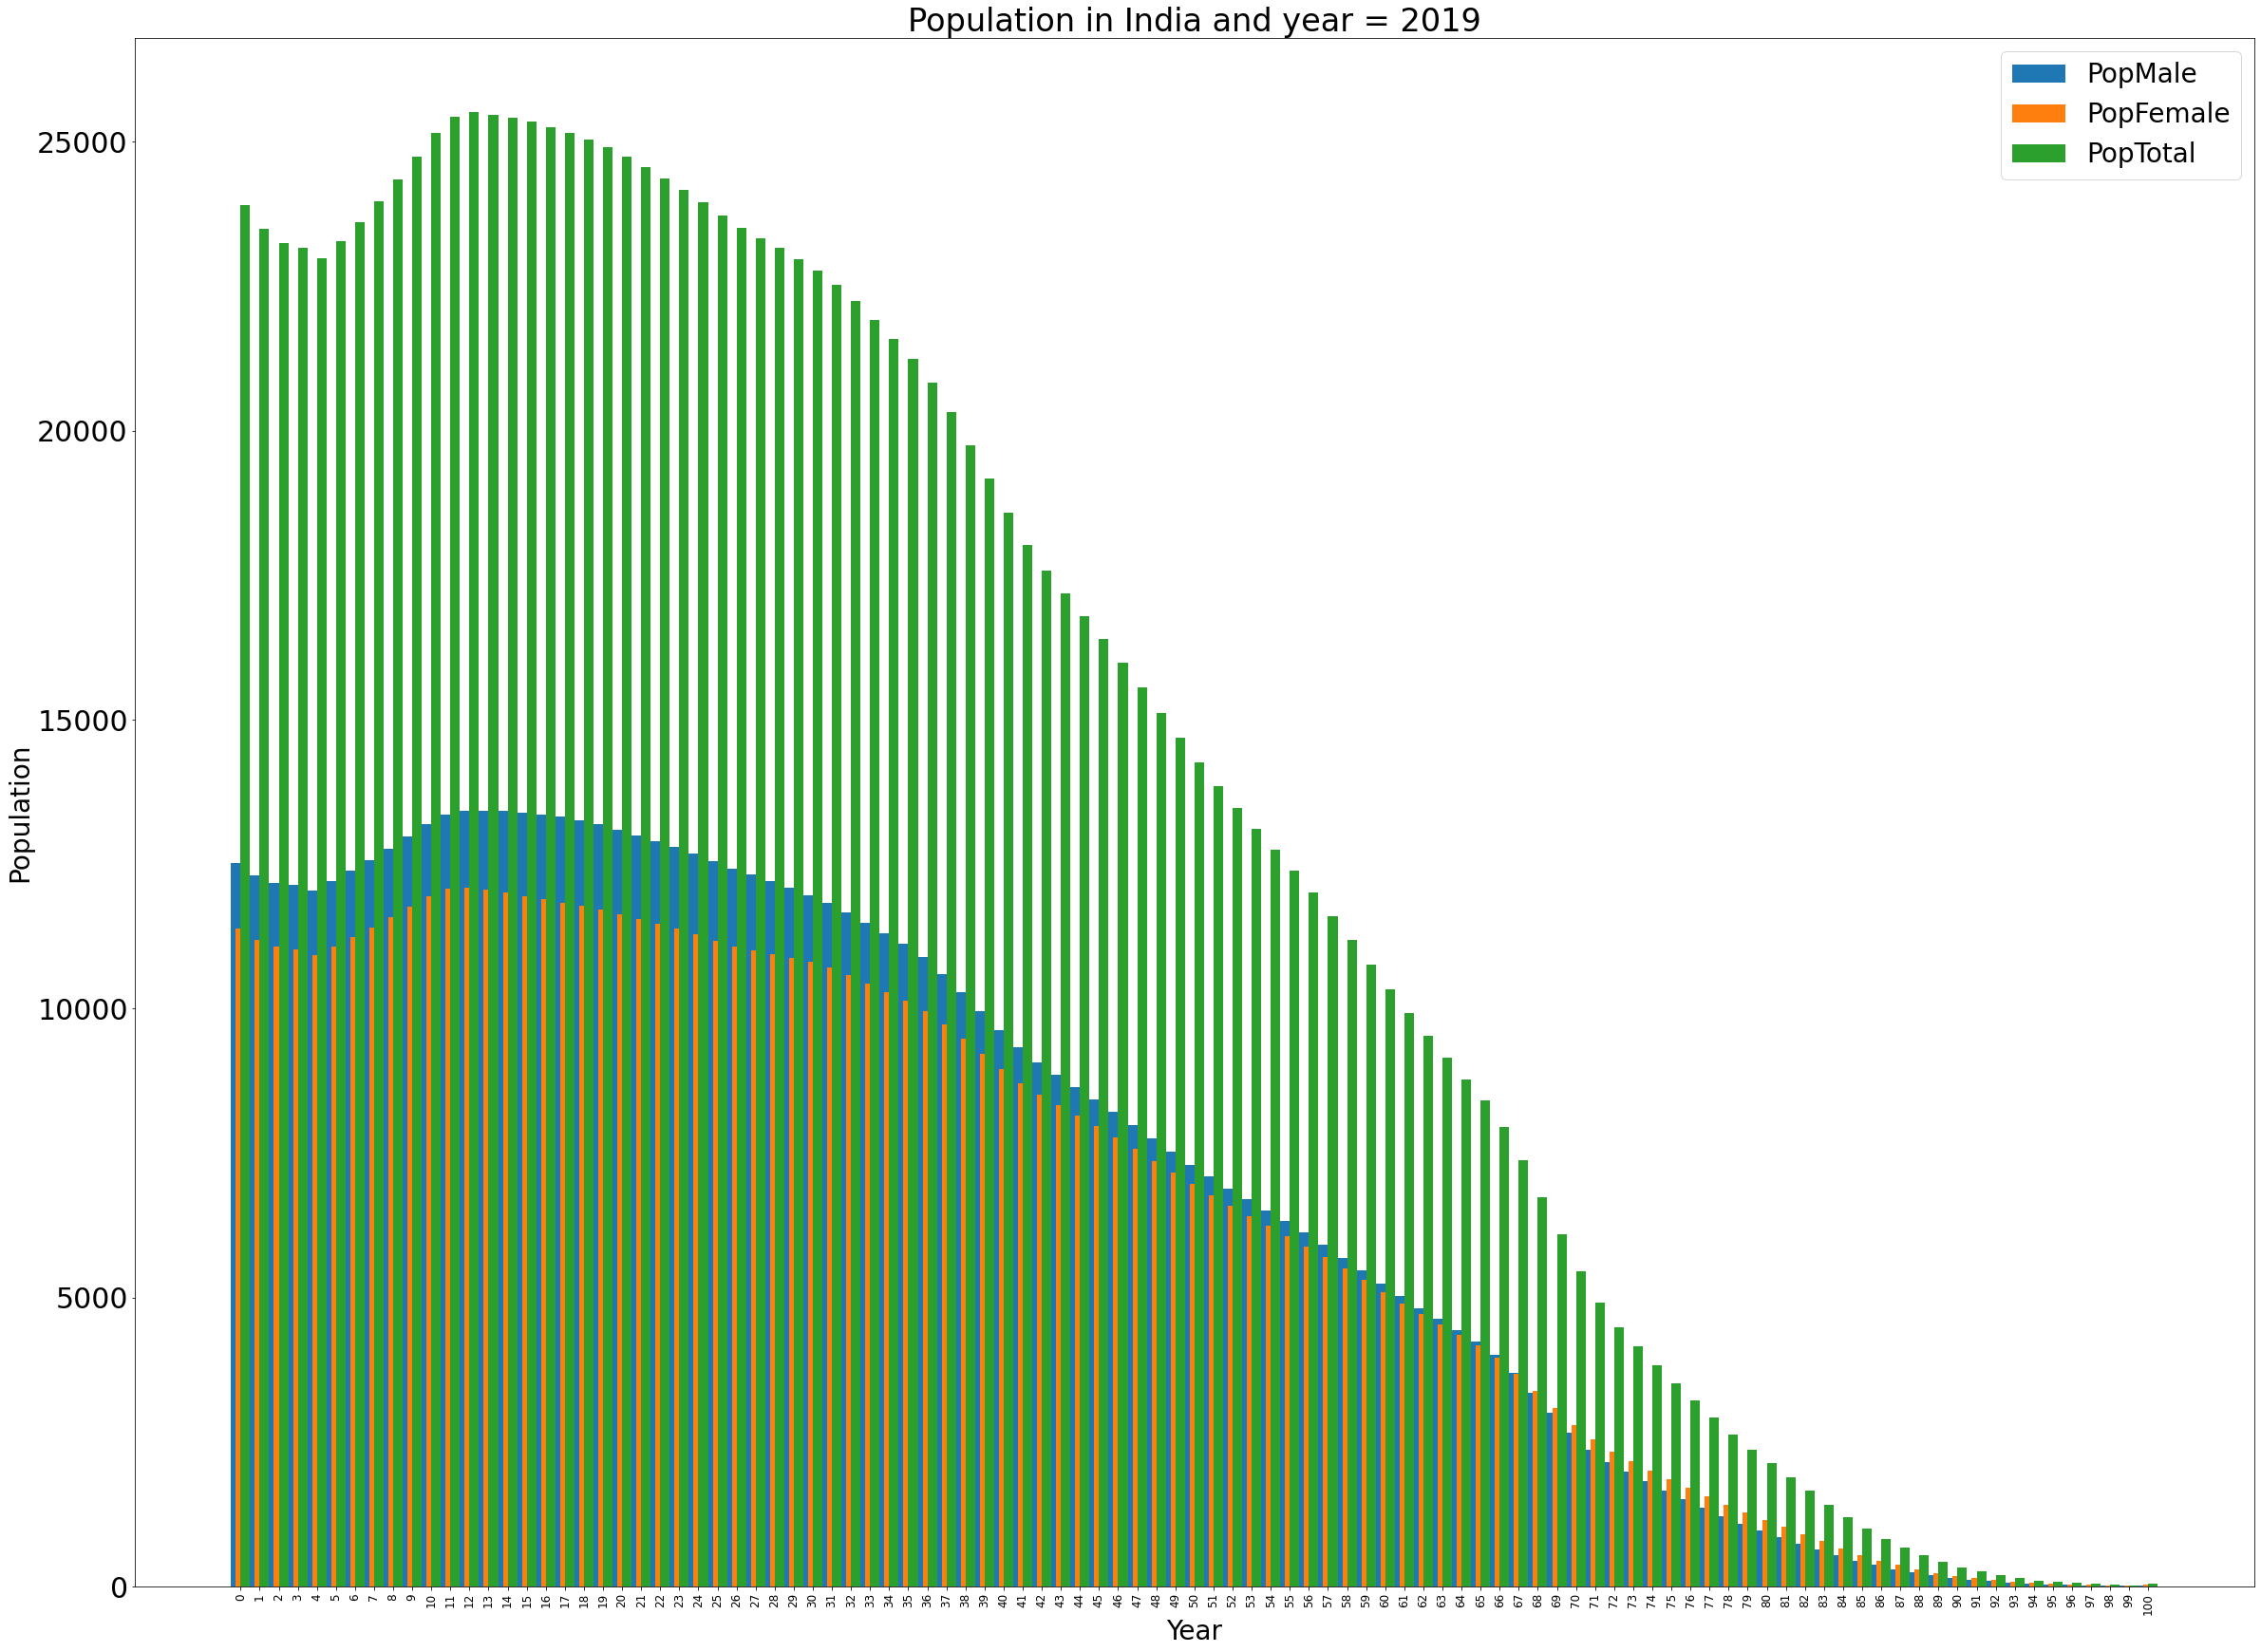

In [8]:
## Visualisation

df = Population_Data_Countires_Wise_country_specific
            

labels = df['AgeGrp']
prev_PopMale = df['PopMale']
prev_PopFemale = df['PopFemale']
prev_PopTotal = df['PopTotal']
        
title1 = 'Population in ' + str(Country_to_look_for) + ' and year = ' + str(Year_to_look_for)
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(40,30))
rects1 = ax.bar(x-width/2, prev_PopMale, width, label='PopMale')
rects2 = ax.bar(x, prev_PopFemale, width, label='PopFemale')
rects3 = ax.bar(x+width/2, prev_PopTotal, width, label='PopTotal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()

## Cleaning Population DATA(Preprocessing)

In [14]:
Population_Data_Countires_Wise = Population_Data_Countires_Wise.replace('United States of America', 'US')
Population_Data_Countires_Wise_descreet = Population_Data_Countires_Wise_descreet.replace('United States of America', 'US')

In [10]:
## Column match

print('-----------------------------------------------------------------')

countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia']
k = 0

match = []
for i in set(Population_Data_Countires_Wise.loc[:,'Country']):
    if(i in countries):
        k +=1
        match.append(i)
        print(i)
        
print(k)
print("-------Not Matching --------------------")
for i in countries:
    if(i not in match ):
        print(i)

-----------------------------------------------------------------
North Macedonia
China
United Kingdom
Chile
Norway
Switzerland
Slovenia
Australia
Kuwait
South Africa
US
India
Italy
Canada
New Zealand
Afghanistan
Sri Lanka
17
-------Not Matching --------------------


In [15]:
## Column match

print('-----------------------------------------------------------------')

countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia']
k = 0

match = []
for i in set(Population_Data_Countires_Wise_descreet.loc[:,'Country']):
    if(i in countries):
        k +=1
        match.append(i)
        print(i)
        
print(k)
print("-------Not Matching --------------------")
for i in countries:
    if(i not in match ):
        print(i)

-----------------------------------------------------------------
North Macedonia
China
United Kingdom
Chile
Norway
Switzerland
Slovenia
Australia
Kuwait
South Africa
US
India
Italy
Canada
New Zealand
Afghanistan
Sri Lanka
17
-------Not Matching --------------------


In [28]:
Population_Data_Countires_Wise_descreet_processed = Population_Data_Countires_Wise_descreet[
    Population_Data_Countires_Wise_descreet['Time'] == 2020 ]
Population_Data_Countires_Wise_descreet_processed = Population_Data_Countires_Wise_descreet_processed[ Population_Data_Countires_Wise_descreet_processed['Variant'] == 'Medium']
Population_Data_Countires_Wise_descreet_processed

,LocID,Country,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
70,4,Afghanistan,2,Medium,2020,2020.5,19976.265,18952.076,38928.341,59.627
954,903,Africa,2,Medium,2020,2020.5,669878.340,670719.773,1340598.113,45.216
1838,1823,African Group,2,Medium,2020,2020.5,668995.562,669831.029,1338826.591,45.571
1989,1560,African Union,2,Medium,2020,2020.5,669307.822,670116.099,1339423.921,45.182
2140,2080,African Union: Central Africa,2,Medium,2020,2020.5,79260.910,79358.728,158619.638,30.066
...,...,...,...,...,...,...,...,...,...,...
277315,900,World,2,Medium,2020,2020.5,3929973.953,3864824.776,7794798.729,59.917
278199,1801,World Bank Regional Groups (developing only),2,Medium,2020,2020.5,3299567.992,3229194.235,6528762.227,71.088
278350,887,Yemen,2,Medium,2020,2020.5,15024.985,14800.983,29825.968,56.492
279234,894,Zambia,2,Medium,2020,2020.5,9103.006,9280.950,18383.956,24.730


##  Writing the cleaned data in Cleaned Folder

In [29]:
Population_Data_Countires_Wise.to_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise_descreet_processed.to_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Descreet_Processed.csv')

## Visualisation After Cleaning 

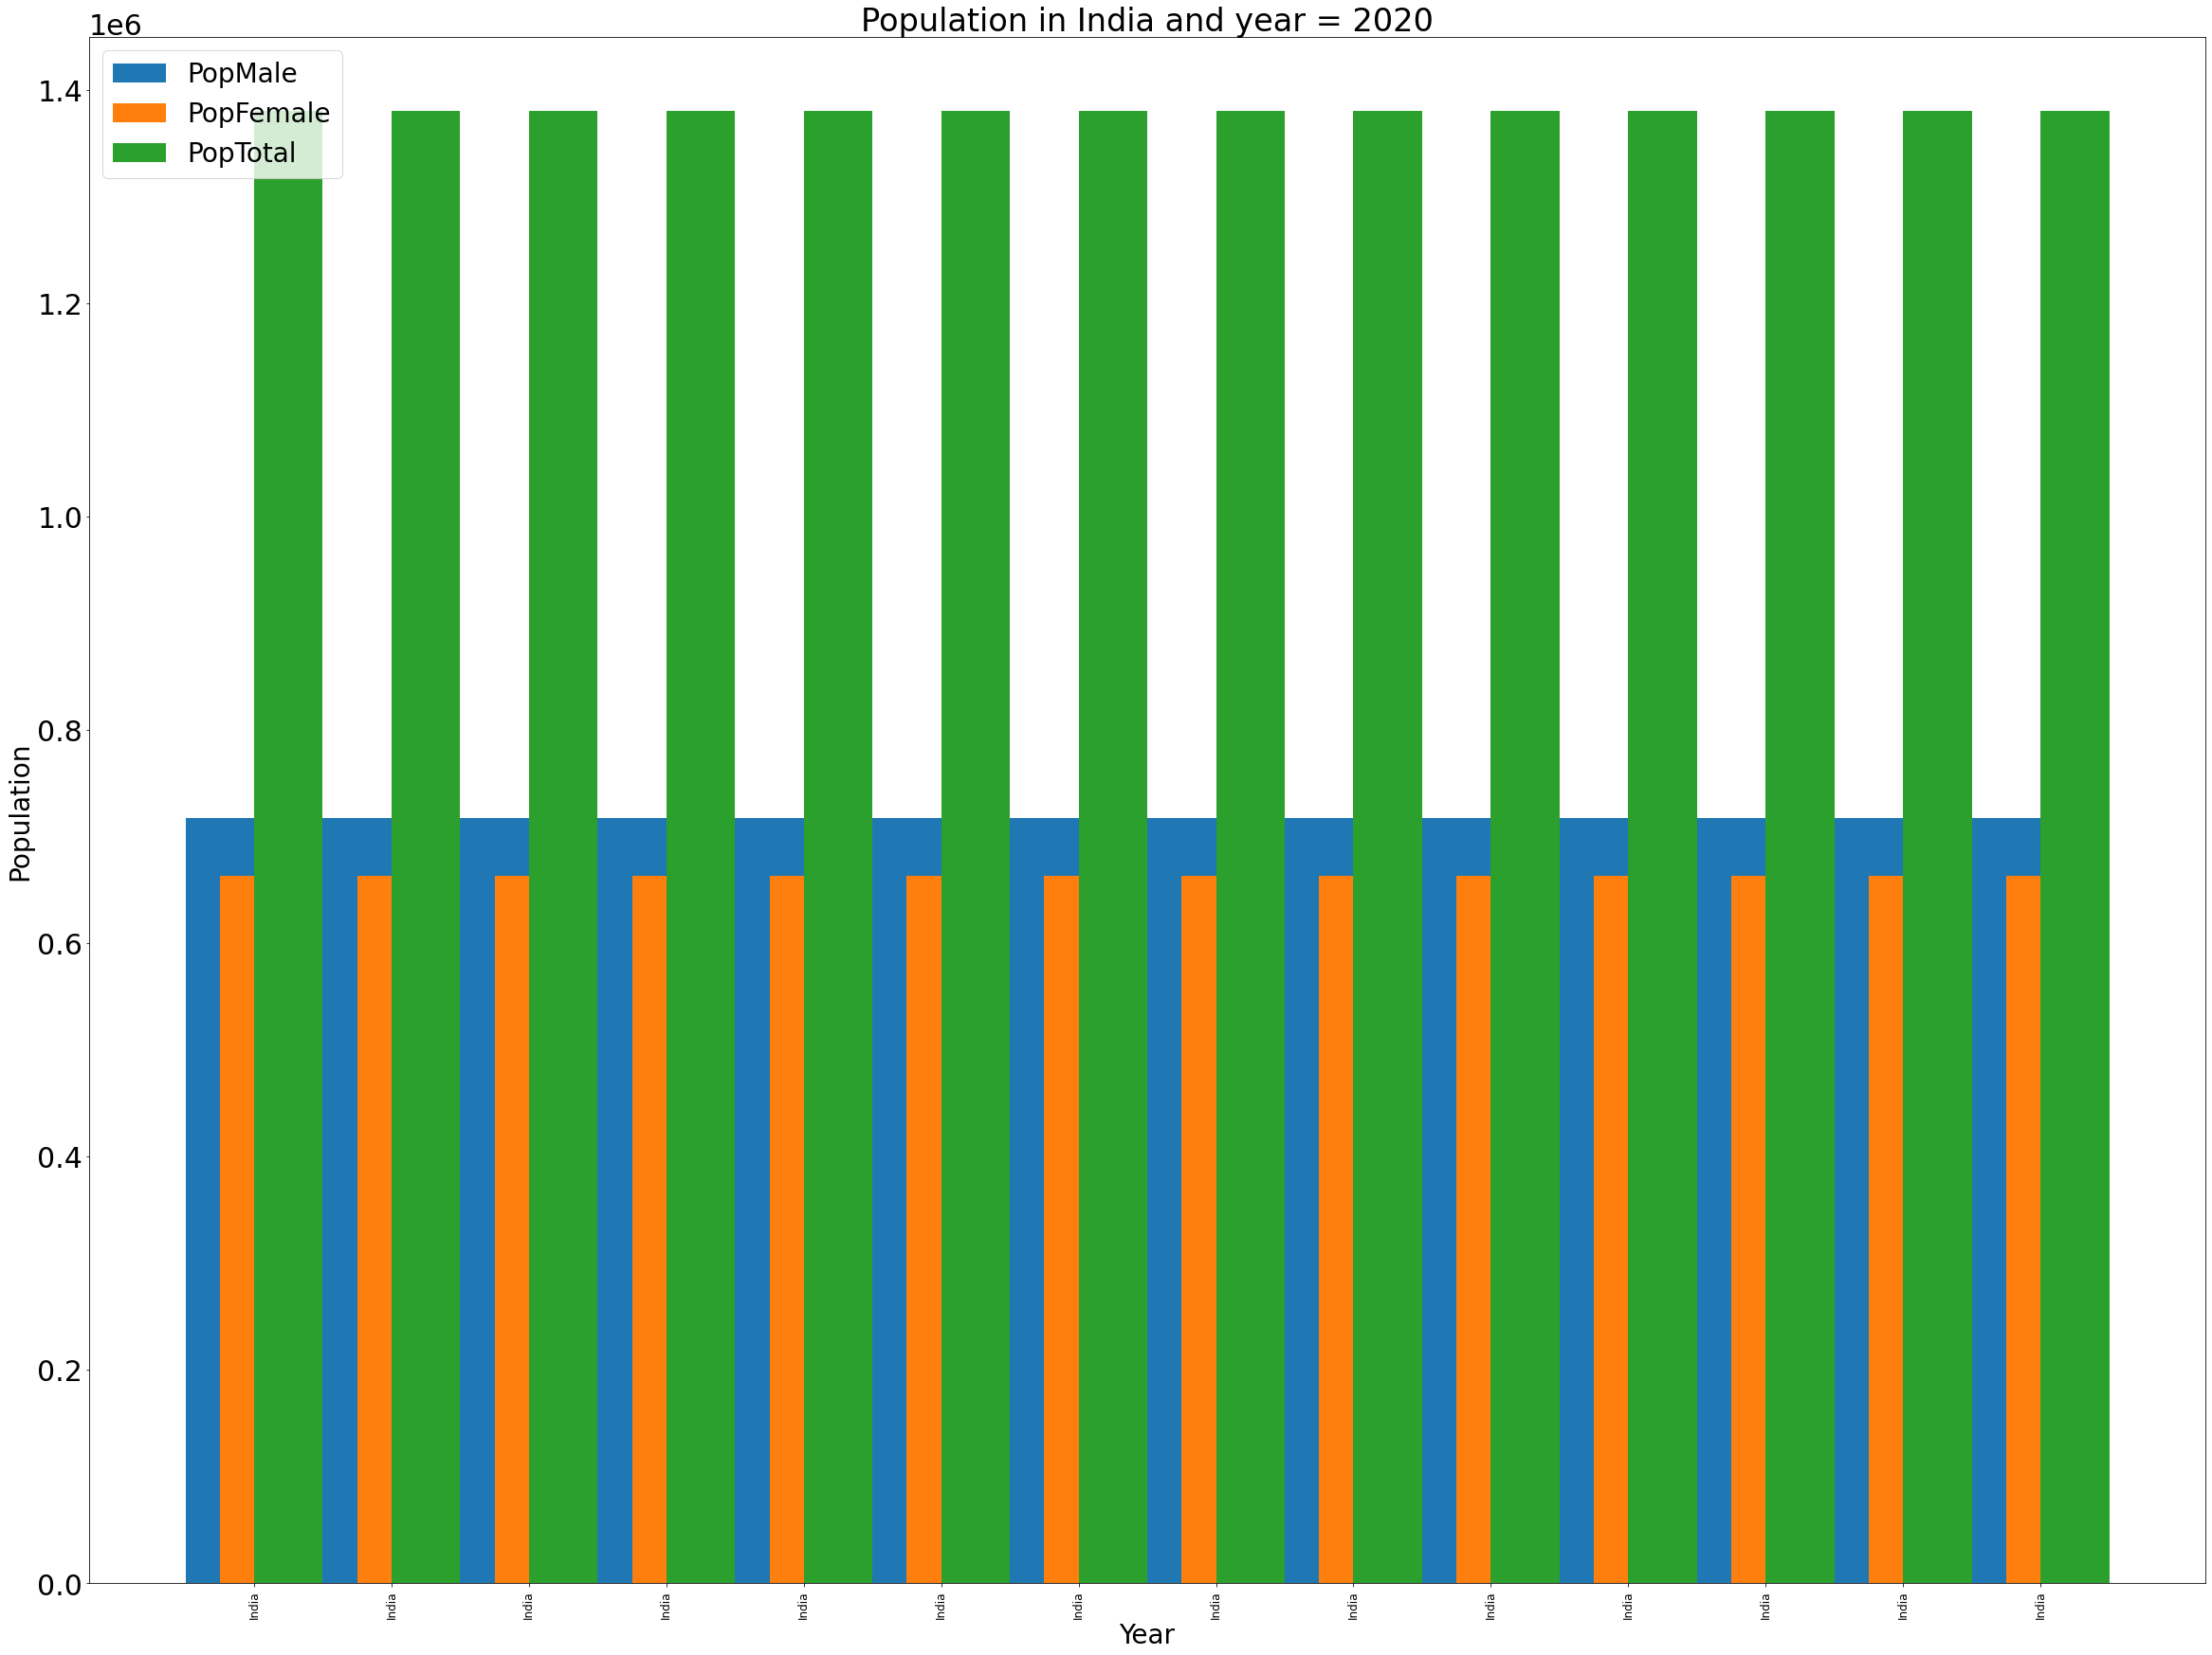

In [33]:
## Visualisation

df = Population_Data_Countires_Wise_country_specific
            

labels = df['AgeGrp']
prev_PopMale = df['PopMale']
prev_PopFemale = df['PopFemale']
prev_PopTotal = df['PopTotal']
        
title1 = 'Population in ' + str(Country_to_look_for) + ' and year = ' + str(Year_to_look_for)
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(40,30))
rects1 = ax.bar(x-width/2, prev_PopMale, width, label='PopMale')
rects2 = ax.bar(x, prev_PopFemale, width, label='PopFemale')
rects3 = ax.bar(x+width/2, prev_PopTotal, width, label='PopTotal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()

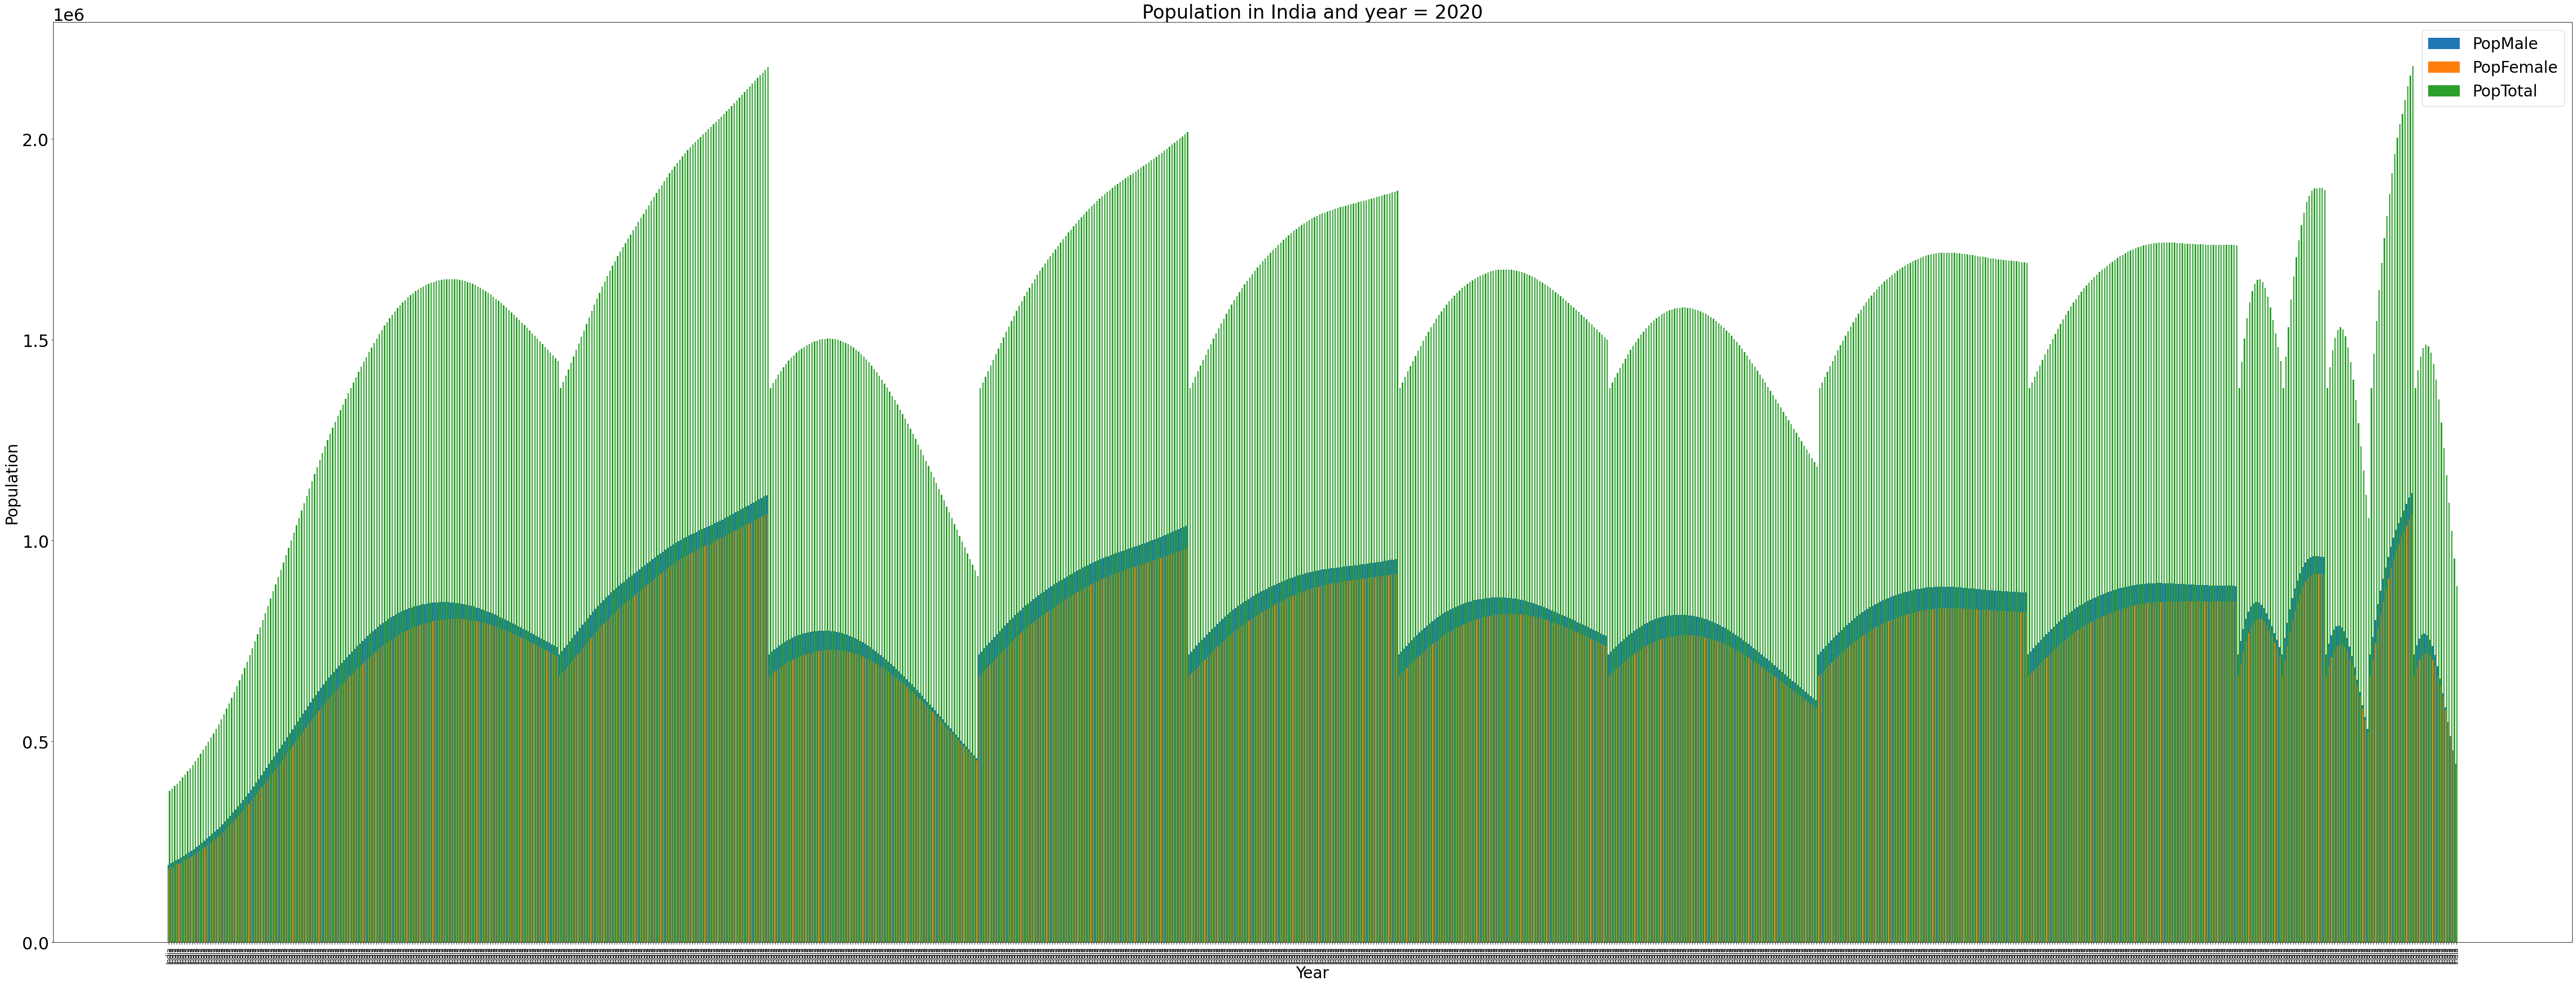

In [37]:
## Visualisation
## Analysing the data Structure
Country_to_look_for = 'India'
Year_to_look_for = 2020
ylab = "Population"
xlab = "Year"



filter1 = Population_Data_Countires_Wise_descreet['Country'] == Country_to_look_for
Population_Data_Countires_Wise_country_specific = Population_Data_Countires_Wise_descreet[filter1]
Population_Data_Countires_Wise_country_specific
#Population_Data_Countires_Wise  ## Uncomment this to view for all countires at once

## Visualisation
df = Population_Data_Countires_Wise_country_specific
            

labels = df['Country']
prev_PopMale = df['PopMale']
prev_PopFemale = df['PopFemale']
prev_PopTotal = df['PopTotal']
        
title1 = 'Population in ' + str(Country_to_look_for) + ' and year = ' + str(Year_to_look_for)
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(80,30))
rects1 = ax.bar(x-width/2, prev_PopMale, width, label='PopMale')
rects2 = ax.bar(x, prev_PopFemale, width, label='PopFemale')
rects3 = ax.bar(x+width/2, prev_PopTotal, width, label='PopTotal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()